## Word Cloud Creation

With the clean dataset, we proceed to create a word cloud. This visual tool highlights the most frequently mentioned words in the reviews, offering a quick and intuitive way to gauge overall sentiment and recurring themes in the feedback.

### Purpose of Creating a Word Cloud

The word cloud serves as a powerful visual aid that complements our textual analysis. By displaying the most common words in a visually striking format, we can easily identify what matters most to passengers. Key benefits include:

- **Quick Insight**: A word cloud immediately reveals the most prominent words and themes in the reviews, allowing us to gauge customer sentiment at a glance.
- **Identify Trends**: Recurring words in the cloud can highlight persistent issues or strengths, guiding us toward areas that may require further investigation or immediate action.
- **Engage Stakeholders**: Visual representations like word clouds can make findings more accessible and engaging for stakeholders, facilitating clearer communication of insights and recommendations.

In [1]:
# libraries for data import and manupulation
import pandas as pd
import numpy as np

# libraries for visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


##### Loading from CSV file

In [2]:
df = pd.read_csv("data/BA_reviews.csv")
df.head(3)

,review_text,review_value,review_time,review_title,reviewer_country,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,✅Trip Verified| Absolutely horrible customer ...,1.0,12th March 2024,"""cancelled our return flight""",(Canada),Family Leisure,Economy Class,Toronto to Mumbai via London,February 2024,no,NaN
1,Not Verified| BA is not what it used to be! A...,7.0,11th March 2024,"""KLM is definitely a league over BA""",(Denmark),Family Leisure,Economy Class,Copenhagen to Port of Spain via London,February 2024,yes,NaN
2,"✅Trip Verified| BA First, it's not even the b...",1.0,10th March 2024,"""Service extremely inattentive""",(United Kingdom),Solo Leisure,First Class,Los Angeles to London,March 2024,no,Boeing 777-300ER


##### Removing parts before " | " in review_text

In [3]:
df.review_text = df.review_text.str.split('|', expand= True)[1]

df.head(3)

,review_text,review_value,review_time,review_title,reviewer_country,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,Absolutely horrible customer service - will ...,1.0,12th March 2024,"""cancelled our return flight""",(Canada),Family Leisure,Economy Class,Toronto to Mumbai via London,February 2024,no,NaN
1,BA is not what it used to be! As much as I l...,7.0,11th March 2024,"""KLM is definitely a league over BA""",(Denmark),Family Leisure,Economy Class,Copenhagen to Port of Spain via London,February 2024,yes,NaN
2,"BA First, it's not even the best business cl...",1.0,10th March 2024,"""Service extremely inattentive""",(United Kingdom),Solo Leisure,First Class,Los Angeles to London,March 2024,no,Boeing 777-300ER


##### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_text        2242 non-null   object 
 1   review_value       3760 non-null   float64
 2   review_time        3765 non-null   object 
 3   review_title       3765 non-null   object 
 4   reviewer_country   3763 non-null   object 
 5   Type Of Traveller  2994 non-null   object 
 6   Seat Type          3763 non-null   object 
 7   Route              2990 non-null   object 
 8   Date Flown         2987 non-null   object 
 9   Recommended        3765 non-null   object 
 10  Aircraft           1958 non-null   object 
dtypes: float64(1), object(10)
memory usage: 323.7+ KB


In [5]:
df.isna().sum()

review_text          1523
review_value            5
review_time             0
review_title            0
reviewer_country        2
Type Of Traveller     771
Seat Type               2
Route                 775
Date Flown            778
Recommended             0
Aircraft             1807
dtype: int64

##### correcting review value column

In [6]:
# Convert non-numeric to NaN
df['review_value'] = pd.to_numeric(df['review_value'], errors='coerce')

# Drop rows with NaN in 'review_value'
df.dropna(subset=['review_value'], inplace=True)

# converting review value column to integer
df['review_value'] = df['review_value'].astype(int)

##### Average Rating Visual

C:\Users\rajat\AppData\Local\Temp\ipykernel_1868\4172228957.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  tail_fin_polygon = patches.Polygon(tail_fin_points, closed=True, color='steelblue', edgecolor='black')


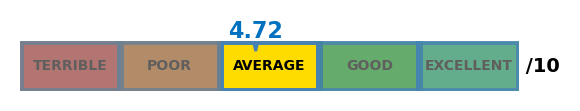

In [7]:
# average_rating calculation
average_rating = df['review_value'].mean()

# Define the scale
scale_max = 10

# Create figure and axis
fig, ax = plt.subplots(figsize=(scale_max // 3, 1), dpi=200)

# Define the ratings breakdown
ratings = ['TERRIBLE', 'POOR', 'AVERAGE', 'GOOD', 'EXCELLENT']
colors = ['#FF4136', '#FF851B', '#FFDC00', '#3e9647', '#3D9970']
ratings_range = [2, 4, 6, 8, 10]  # Define the range end for each rating category

# border thickness
border_linewidth = 2.5

# Draw the colored rectangles for the gauge
for i, (end_range, color) in enumerate(zip(ratings_range, colors)):
    start_range = ratings_range[i-1] if i != 0 else 0
    width = end_range - start_range
    # Set alpha to 0.7 for all categories except for the one that contains the average rating
    alpha = 0.8 if not start_range < average_rating <= end_range else 1
    rect = patches.Rectangle((start_range, 0), width, 1, facecolor=color, edgecolor="steelblue", linewidth=border_linewidth, alpha=alpha)
    ax.add_patch(rect)

    # Add the rating text in the middle of each category range
    plt.text((start_range + end_range)/2, 0.5, ratings[i],
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=5, color='#605f5e' if alpha != 1 else 'black', weight='bold')

# Create a shaded area for the average rating
shaded_rect = patches.Rectangle((-.7, 0), average_rating, 1, color='grey', alpha=0.6, linewidth=0)
ax.add_patch(shaded_rect)

# Pointer stylized airplane tail-fin shape
tail_fin_points = [(average_rating, 0.8), (average_rating - 0.1, 1.2), (average_rating + 0.1, 1.2)]
tail_fin_polygon = patches.Polygon(tail_fin_points, closed=True, color='steelblue', edgecolor='black')
ax.add_patch(tail_fin_polygon)

# Add text to indicate the scale maximum
plt.text(scale_max, 0.5, f' /{scale_max}',
         horizontalalignment='left',
         verticalalignment='center',
         fontsize=7, color='black', weight='bold')


# Add the average rating text above the pointer
plt.text(average_rating, 1.2, f'{average_rating:.2f}',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=8, color='#0070C0', weight='bold')

# Set the axis limits and aspect
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, scale_max)
ax.set_ylim(0, 1)

# Turn off the axis
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

##### Total Reviews

In [8]:
total_reviews = df['review_value'].count()
total_reviews

3760

##### Total number of different countires

In [9]:
total_countries = len(df['reviewer_country'].unique())
total_countries

73

##### Top 5 countries from which reviews are written

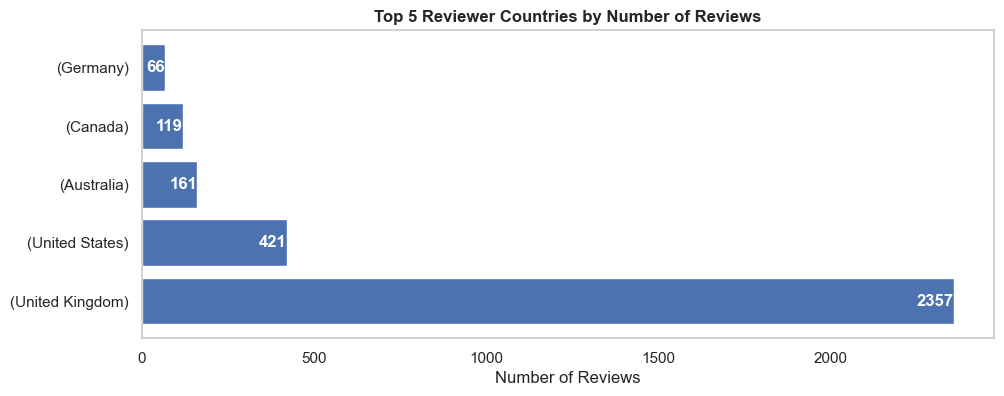

In [10]:
# Calculating top 5 reviewer countries
reviewer_country_counts = df['reviewer_country'].value_counts()
top_5_reviewer_country_counts = reviewer_country_counts[:5]

# Setting the seaborn style
sns.set(style="whitegrid")

# Creating the horizontal bar plot
plt.figure(figsize=(11, 4))
bars = plt.barh(top_5_reviewer_country_counts.index, top_5_reviewer_country_counts.values)
plt.xlabel('Number of Reviews')
plt.title('Top 5 Reviewer Countries by Number of Reviews', weight='bold')
plt.grid()

# Adding annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center', ha='right', color='white', weight ='bold')

plt.show()

Assigning regions to reviewer countries

In [11]:
# Step 1: Remove parentheses from country names
df['reviewer_country'] = df['reviewer_country'].str.strip('()')

# Step 2: Define country to region mapping
country_to_region = {
    'United Kingdom': 'Western Europe',
    'United States': 'North America',
    'Australia': 'Australia & New Zealand',
    'Canada': 'North America',
    'Germany': 'Western Europe',
    'Ireland': 'Western Europe',
    'South Africa': 'Middle East & Africa',
    'Switzerland': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Spain': 'Northern & Southern Europe',
    'Singapore': 'Southeast Asia',
    'France': 'Western Europe',
    'Belgium': 'Western Europe',
    'Thailand': 'Southeast Asia',
    'United Arab Emirates': 'Middle East & Africa',
    'Italy': 'Northern & Southern Europe',
    'Sweden': 'Northern & Southern Europe',
    'India': 'Asia (excluding Southeast Asia)',
    'China': 'Asia (excluding Southeast Asia)',
    'Hong Kong': 'Asia (excluding Southeast Asia)',
    'Greece': 'Northern & Southern Europe',
    'Malaysia': 'Southeast Asia',
    'Portugal': 'Northern & Southern Europe',
    'Denmark': 'Northern & Southern Europe',
    'Austria': 'Western Europe',
    'New Zealand': 'Australia & New Zealand',
    'Saudi Arabia': 'Middle East & Africa',
    'Poland': 'Eastern Europe & Russia',
    'Mexico': 'North America',
    'Qatar': 'Middle East & Africa',
    'Ghana': 'Middle East & Africa',
    'Argentina': 'Latin America and the Caribbean',
    'Cyprus': 'Northern & Southern Europe',
    'Japan': 'Asia (excluding Southeast Asia)',
    'Romania': 'Eastern Europe & Russia',
    'Kuwait': 'Middle East & Africa',
    'Norway': 'Northern & Southern Europe',
    'Czech Republic': 'Eastern Europe & Russia',
    'South Korea': 'Asia (excluding Southeast Asia)',
    'Iceland': 'Northern & Southern Europe',
    'Brazil': 'Latin America and the Caribbean',
    'Israel': 'Middle East & Africa',
    'Turkey': 'Middle East & Africa',
    'Slovakia': 'Eastern Europe & Russia',
    'Taiwan': 'Asia (excluding Southeast Asia)',
    'Nigeria': 'Middle East & Africa',
    'Bulgaria': 'Eastern Europe & Russia',
    'Russian Federation': 'Eastern Europe & Russia',
    'Finland': 'Northern & Southern Europe',
    'Luxembourg': 'Western Europe',
    'Philippines': 'Southeast Asia',
    'Botswana': 'Middle East & Africa',
    'Bermuda': 'Latin America and the Caribbean',
    'Hungary': 'Eastern Europe & Russia',
    'Ukraine': 'Eastern Europe & Russia',
    'Egypt': 'Middle East & Africa',
    'Laos': 'Southeast Asia',
    'Dominican Republic': 'Latin America and the Caribbean',
    'Bahrain': 'Middle East & Africa',
    'Trinidad & Tobago': 'Latin America and the Caribbean',
    'Barbados': 'Latin America and the Caribbean',
    'Indonesia': 'Southeast Asia',
    'Chile': 'Latin America and the Caribbean',
    'Costa Rica': 'Latin America and the Caribbean',
    'Cayman Islands': 'Latin America and the Caribbean',
    'Jordan': 'Middle East & Africa',
    'Ecuador': 'Latin America and the Caribbean',
    'Vietnam': 'Southeast Asia',
    'Saint Kitts and Nevis': 'Latin America and the Caribbean',
    'Panama': 'Latin America and the Caribbean',
    'Senegal': 'Middle East & Africa',
    'Oman': 'Middle East & Africa',
}

# Step 3: Map cleaned country names to their respective regions
df['region'] = df['reviewer_country'].map(country_to_region)

# group by the new 'region' column and analyse
region_review_stats = df.groupby('region')['review_value'].agg(['count', 'mean']).rename(columns={'count': 'Number of Reviews', 'mean': 'Average Review Value'})
print(region_review_stats)


                                 Number of Reviews  Average Review Value
region                                                                  
Asia (excluding Southeast Asia)                 68              5.647059
Australia & New Zealand                        172              4.465116
Eastern Europe & Russia                         32              4.562500
Latin America and the Caribbean                 21              5.428571
Middle East & Africa                           110              5.072727
North America                                  548              4.069343
Northern & Southern Europe                     131              5.526718
Southeast Asia                                  71              4.718310
Western Europe                                2605              4.794242


Visualising regional review scores 

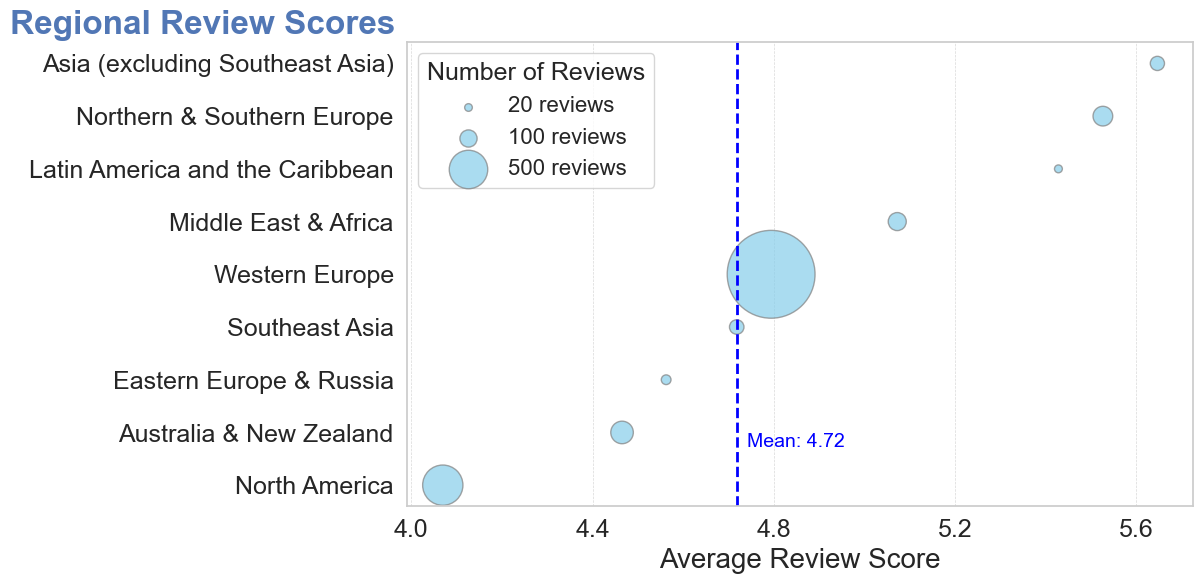

In [12]:
# Calculate the mean review value across all countries (for use as a reference line)
mean_review_value = round(df['review_value'].mean(), 2)

# Get the regions by average review value
all_regions_by_review = region_review_stats.sort_values(by='Average Review Value', ascending=True).head(15)

# Normalize the size of the bubbles
size_multiplier = 4000  # bubbles size
all_regions_by_review['Size'] = (all_regions_by_review['Number of Reviews'] / all_regions_by_review['Number of Reviews'].max()) * size_multiplier

# Set the seaborn style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the horizontal bubble chart
colors = np.where(all_regions_by_review.index == 'British Airways', 'orange', 'skyblue')

bubble = plt.scatter(all_regions_by_review['Average Review Value'], all_regions_by_review.index,
                     s=all_regions_by_review['Size'], alpha=0.7, color=colors, edgecolors='grey')

# Adding a vertical line for the mean
plt.axvline(x=mean_review_value, color='blue', linestyle='--', linewidth=2, label=f'Mean Review Score: {mean_review_value}')
# Write mean text next to the mean score line
plt.text(mean_review_value + 0.02, len(all_regions_by_review) * 0.08, f'Mean: {mean_review_value}', fontsize=14, color='blue')

# Labels and title
plt.title('Regional Review Scores', fontsize=24, weight='bold', x=-0.26, color= '#5177b5')
plt.xlabel('Average Review Score', fontsize=20)

# axis ticks
xticks_values = np.arange(4, 6, .4)
plt.xticks(xticks_values, fontsize=18)
plt.yticks(fontsize=18)

# Define legend: create handles for the sizes
sizes = [20, 100, 500]  # Example sizes for small, medium, and large bubbles
labels = ['20 reviews', '100 reviews', '500 reviews']  # Corresponding labels

# Generate custom handles
handles = [plt.scatter([], [], s=(size / all_regions_by_review['Number of Reviews'].max()) * size_multiplier,
                       color='skyblue', alpha=0.7, edgecolors='grey', label=f'{size} reviews')
           for size in sizes]

# Create the legend
legend = plt.legend(handles, labels, title="Number of Reviews", fontsize=16, title_fontsize=18,
                    loc='upper left', scatterpoints=1)

# vertical grid lines
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey', alpha=0.3, axis='x')

# Remove horizontal gridlines
plt.gca().yaxis.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##### Wordcloud

In [13]:
!pip install wordcloud

##### adding Stopwords

In [14]:
from wordcloud import WordCloud, STOPWORDS

# Starting with default stopwords from WordCloud and then adding my custom ones
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['BA','British Airway','flight','Airway','Airways','British',"one", "back", "now", "even", "will", "made", "way", "got", "two", 
                         "really", "well", "hour", "time", "day", "told", "asked", "said", "back", "go", "still", "put", "take","good","u","airline","hours","us"])
custom_stopwords

{'Airway',
 'Airways',
 'BA',
 'British',
 'British Airway',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'airline',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'asked',
 'at',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'day',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'even',
 'ever',
 'few',
 'flight',
 'for',
 'from',
 'further',
 'get',
 'go',
 'good',
 'got',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'hour',
 'hours',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'mad

##### Wordclound for Negative reviews only

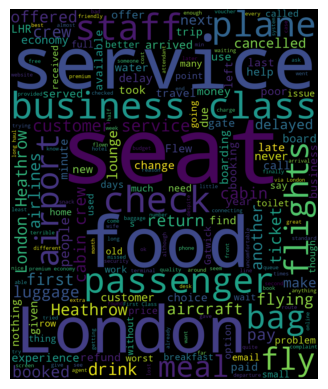

In [15]:
# prepare data
filtered_negative_df= df[df['review_value']<=5]

# joining all review text
all_text = ' '.join(text for text in filtered_negative_df['review_text'].dropna())

# generate wordcloud image 
wordcloud = WordCloud(stopwords= custom_stopwords, background_color='black',width=1000,height=1200).generate(all_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Wordcloud for Positive reviews only

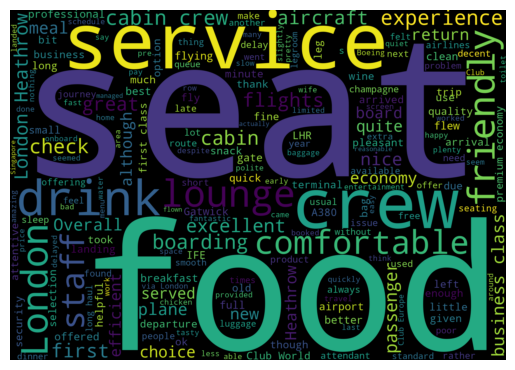

In [16]:
# prepare data
filtered_positive_df= df[df['review_value']>=7]

# joining all review text
all_text = ' '.join(text for text in filtered_positive_df['review_text'].dropna())

# generate wordcloud image 
wordcloud = WordCloud(stopwords= custom_stopwords, background_color='black',width=1700,height=1200).generate(all_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### saving changes to csv file

In [17]:
df.to_csv("data/BA_reviews.csv", index=False)